In [2]:
!pip install tensorflow

In [3]:
import numpy as np

In [4]:
import pandas as pd

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [5]:
import tensorflow as tf

C:\Users\Alunos\anaconda3\lib\site-packages\scipy\__init__.py:143: UserWarning: A NumPy version >=1.19.5 and <1.27.0 is required for this version of SciPy (detected version 2.0.2)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"

A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\Alunos\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Alunos\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Alunos\anaconda3\lib\site-pac

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "C:\Users\Alunos\anaconda3\lib\runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\Alunos\anaconda3\lib\runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "C:\Users\Alunos\anaconda3\lib\site-packages\ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "C:\Users\Alunos\anaconda3\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance
    app.start()
  File "C:\Users\Alunos\anaconda3\lib\site

AttributeError: _ARRAY_API not found

ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [4]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv("./PETR4-SA.csv")

In [26]:
X = df[["Date", "Open", "High", "Low"]]

In [27]:
Y = df[["Date", "Close"]]

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state = 50)

In [30]:
X_train = X_train.sort_values(by=["Date"])
Y_train = Y_train.sort_values(by=["Date"])
X_test = X_test.sort_values(by=["Date"])
Y_test = Y_test.sort_values(by=["Date"])

In [31]:
modelo = Sequential()
modelo.add( Input( (3,) ) )
modelo.add( Dense( 32, activation="relu" ) )
modelo.add( Dense( 8, activation="relu" ) )
modelo.add( Dense( 1 ) )
modelo.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 32)                  │             128 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 8)                   │             264 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401 (1.57 KB)

 Trainable params: 401 (1.57 KB)

 Non-trainable params: 0 (0.00 B)

In [32]:
adam = Adam(learning_rate = 0.01)
modelo.compile( optimizer = adam, loss="mean_squared_error", metrics=["Accuracy"])

In [33]:
modelo.fit( X_train[["Open", "High", "Low"]], Y_train[["Close"]], epochs=50, batch_size = 16 )

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - Accuracy: 0.0000e+00 - loss: 1123.9943
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - Accuracy: 0.0000e+00 - loss: 54.5077
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0000e+00 - loss: 17.3286 
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0000e+00 - loss: 12.7173 
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0000e+00 - loss: 4.2061  
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.0000e+00 - loss: 1.3459 
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.0000e+00 - loss: 0.4411 
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.0000e+00 - loss: 0.2011 
Epoch 9/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0000e+00 - loss: 0.1503 
Epoch 10/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - Accuracy: 0.0000e+00 - loss: 0.1221  
Epoch 11/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - Accuracy: 0.0000e+00 - loss: 0.1245 
Epoch 12/50
1

In [34]:
acc = modelo.evaluate( X_test[["Open", "High", "Low"]], Y_test[["Close"]] )
acc

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - Accuracy: 0.0000e+00 - loss: 0.2517  


[0.25402432680130005, 0.0]

In [40]:
Y_hat = modelo.predict(X_test[["Open", "High", "Low"]])

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


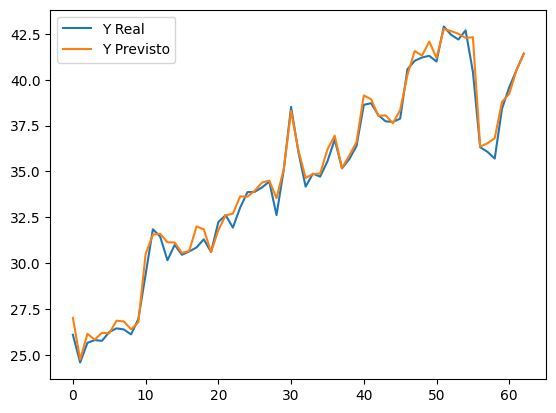

In [41]:
plt.plot(range(len(Y_test)), Y_test["Close"], label="Y Real")
plt.plot(range(len(Y_test)), Y_hat, label="Y Previsto")
plt.legend()
plt.show()